In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# PROBLEM STMNT  1
Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [6]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
df.shape

(8425, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [9]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [10]:
df.dropna(subset=['Temp9am','Humidity9am','WindSpeed9am','MaxTemp','MinTemp','Rainfall',
'Temp3pm',
'RainToday', 
'RainTomorrow'],inplace=True)

In [11]:
df.duplicated().sum()

1510

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(6411, 23)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6411 entries, 0 to 8423
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6411 non-null   object 
 1   Location       6411 non-null   object 
 2   MinTemp        6411 non-null   float64
 3   MaxTemp        6411 non-null   float64
 4   Rainfall       6411 non-null   float64
 5   Evaporation    3719 non-null   float64
 6   Sunshine       3418 non-null   float64
 7   WindGustDir    5649 non-null   object 
 8   WindGustSpeed  5649 non-null   float64
 9   WindDir9am     5736 non-null   object 
 10  WindDir3pm     6225 non-null   object 
 11  WindSpeed9am   6411 non-null   float64
 12  WindSpeed3pm   6405 non-null   float64
 13  Humidity9am    6411 non-null   float64
 14  Humidity3pm    6408 non-null   float64
 15  Pressure9am    5257 non-null   float64
 16  Pressure3pm    5258 non-null   float64
 17  Cloud9am       4709 non-null   float64
 18  Cloud3pm

We observe few null values are present in dataset  
Also,there are 8423 records out of which duplicated records are been dropped  
Datset has 16 features with float datatype ,while 7 columns with objet datatype

In [15]:
df.fillna(df.mean(),inplace=True)

In [16]:
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      762
WindGustSpeed      0
WindDir9am       675
WindDir3pm       186
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
dtype: int64

In [17]:
df.WindGustDir.value_counts()

E      513
SW     450
N      438
W      423
WSW    406
WNW    386
SSE    370
SE     361
S      354
ENE    347
NE     295
SSW    291
NW     288
NNE    282
ESE    264
NNW    181
Name: WindGustDir, dtype: int64

In [18]:
df['WindGustDir'].mode()[0]

'E'

In [19]:
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0],inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0],inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0],inplace=True)

In [20]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [21]:
df.RainTomorrow.value_counts()

No     4909
Yes    1502
Name: RainTomorrow, dtype: int64

As RainTomorow has 2 unique values out of 6411 records,which have categorical values of Yes and No  
Hence,the problem is solved as CLASSIFICATION PROBLEM


In [22]:
#Converting date column dataype from object to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
df['Year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day

In [24]:
df.set_index('Date', inplace=True)

SEPERATING NUMERICAL AND CATEGORICAL COLUMNS

In [25]:
cat=[]
num=[]
for i in df:
    if df[i].dtypes=="object":
        cat.append(i)
    else:
        num.append(i)
        
print(cat)
print(num)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'month', 'day']


### EDA-UNIVARIATE ANALYSIS

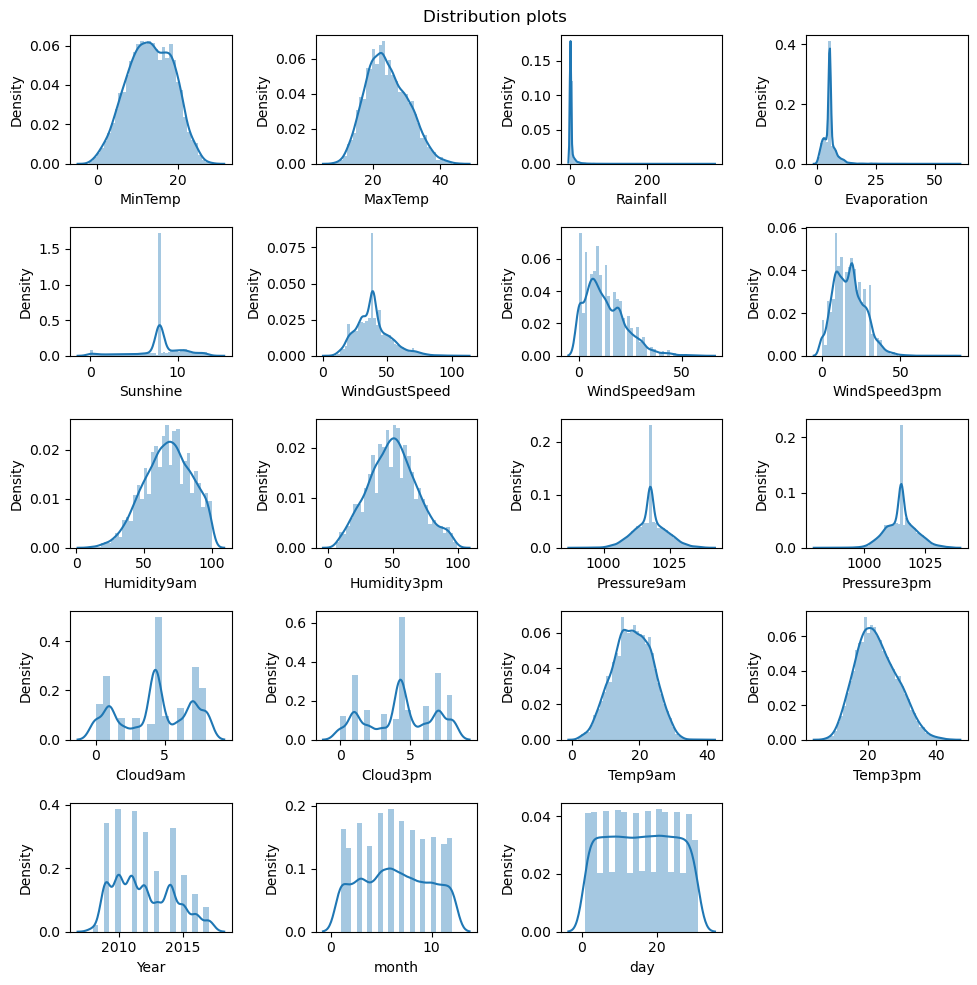

In [53]:
#3Distribution plot

plt.figure(figsize=(10,10))
p=1
for u in num:
    if p<=20:
        plt.subplot(5,4,p)
        sns.distplot(df[u])
        plt.xlabel(u)

    p+=1
plt.suptitle('Distribution plots')
plt.tight_layout()

From above graphs we notice that  
Rainfall ,evaporation have right skewed data   
Windspeed9am,Windspeed3pm also have liittle right skewed data 
Pressure is skewed towards left  
Tempuarture has less skewness,which is not evitable in graph can be analysed further   
Sunshine have 2 peaks of data

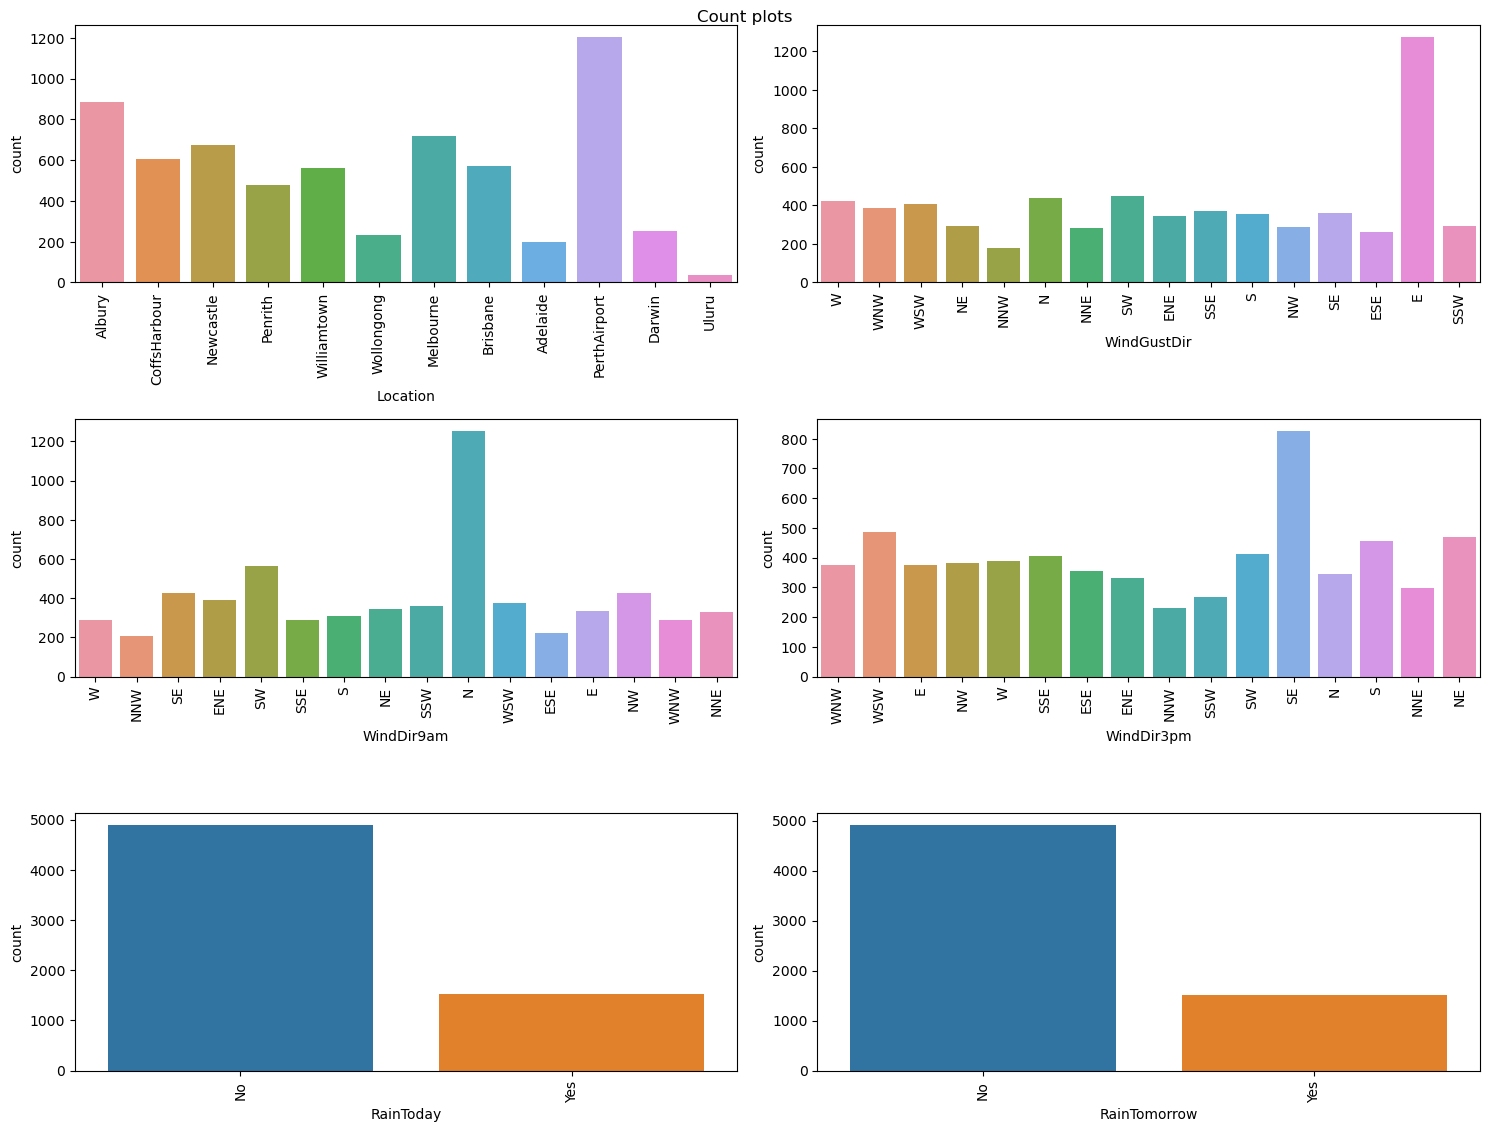

In [55]:
#Count plot

plt.figure(figsize=(15,15))
p=1
for c in cat:
    if p<=8:
        plt.subplot(4,2,p)
        sns.countplot(data=df,x=c)
        plt.xticks(rotation=90)

    p+=1
plt.suptitle('Count plots')
plt.tight_layout()

From above graphs we observe that  
Chances of Raining Today are only 25% as compared to not Raining  
Also,chances of raining tomm are almost 20% as compared to no rain tomm

In [68]:
num


['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'month',
 'day']

### BIVARIATE ANALYSIS

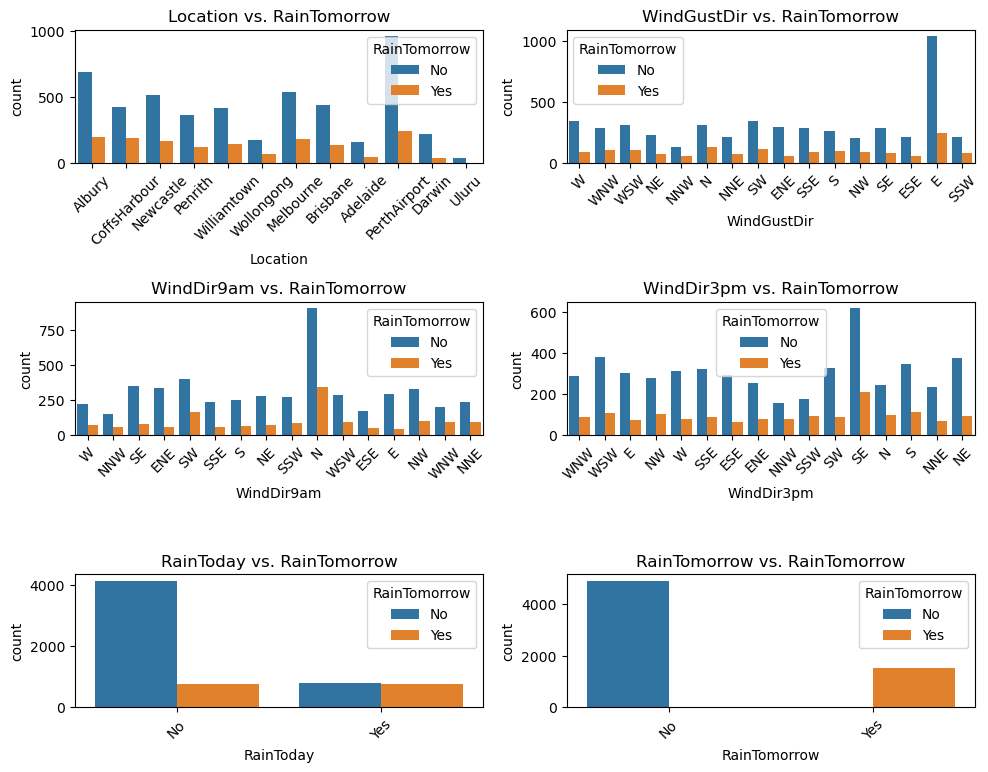

In [82]:
plt.figure(figsize=(10,10))
p=1
for f in cat:
    if p<=7:
        plt.subplot(4,2,p)
        sns.countplot(x=f, hue='RainTomorrow', data=df)
        plt.title(f'{f} vs. RainTomorrow')
        plt.xticks(rotation=45)
    p+=1
plt.tight_layout()

From above graph we analyse that if it has Raintoday there are increased chances of Rainingtomm   
Adelaide has highest chances of Raining Tomm  
If windgust dir is East,there are more chances of Raining Tomm   
If Winddirat 9am is in North ,there are more cahances of Raining Tomm  
If winddir at 3 pm isin southEast ,then there are more chances of Raining tomm  



<Axes: xlabel='RainTomorrow', ylabel='Sunshine'>

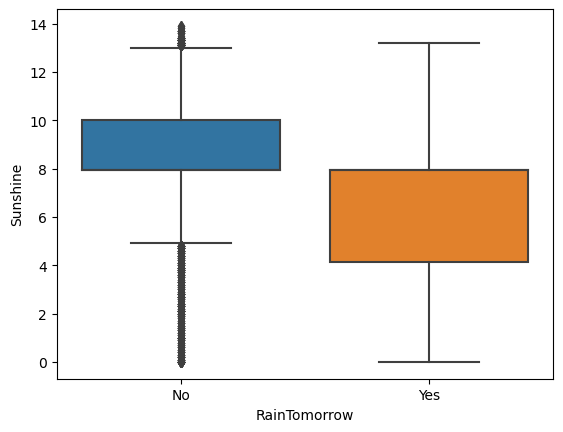

In [83]:
sns.boxplot(x='RainTomorrow', y='Sunshine', data=df)

The more the Sunshine ,the less chances of Raining tomm  
Both variables are negatively correalted to each other


In [84]:
num

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'month',
 'day']

<Axes: xlabel='RainTomorrow', ylabel='MinTemp'>

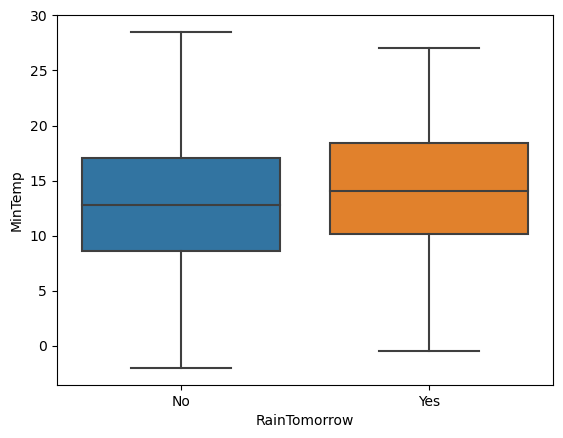

In [85]:
sns.boxplot(x='RainTomorrow', y='MinTemp', data=df)

If  min temp between 10-18 the more the chances of Raining tomm

<Axes: xlabel='RainTomorrow', ylabel='MaxTemp'>

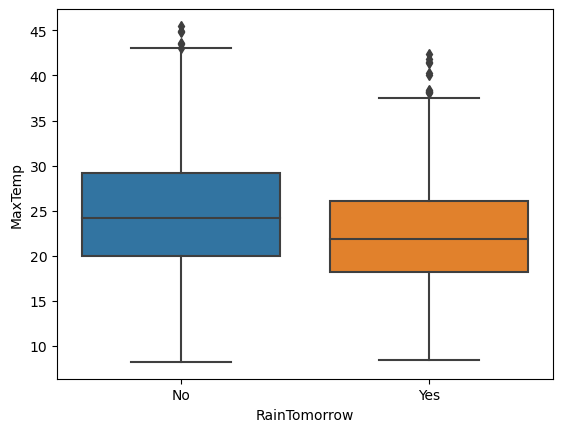

In [86]:
sns.boxplot(x='RainTomorrow', y='MaxTemp', data=df)

More the max temp,less are cahances of Raaiing tomm

<Axes: xlabel='RainTomorrow', ylabel='Rainfall'>

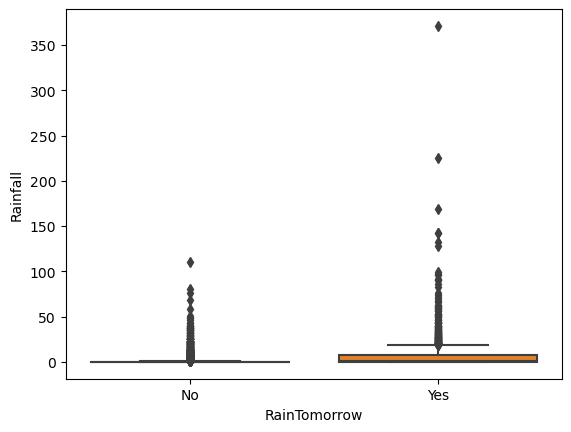

In [87]:
sns.boxplot(x='RainTomorrow', y='Rainfall', data=df)

As Rainfall increases more the chances of Raining tomm

<Axes: xlabel='RainTomorrow', ylabel='Humidity3pm'>

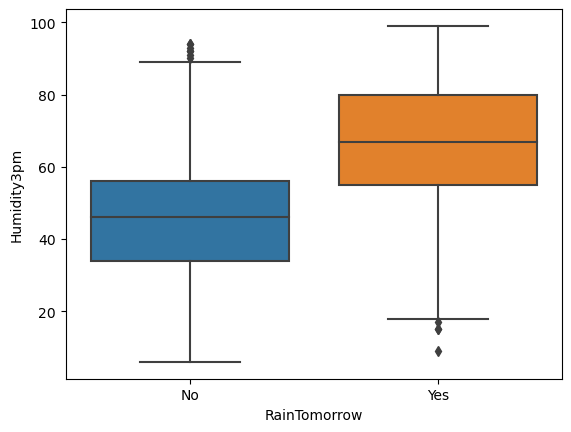

In [88]:
sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=df)

More the humidity,more cahnces of raining tomm

<Axes: xlabel='RainTomorrow', ylabel='WindGustSpeed'>

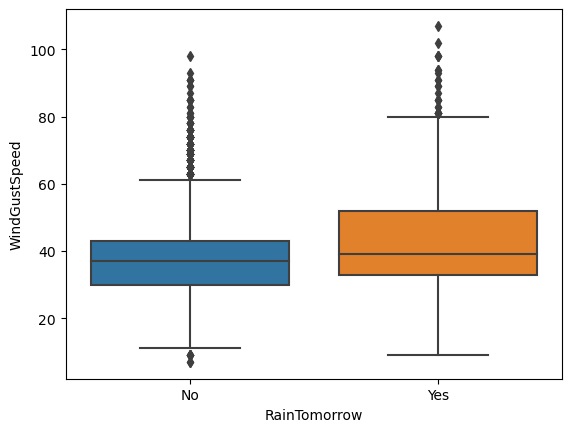

In [91]:
sns.boxplot(x='RainTomorrow', y='WindGustSpeed', data=df)

More the windspeed,more are chances of Raining Tomm

<Axes: xlabel='RainTomorrow', ylabel='Pressure3pm'>

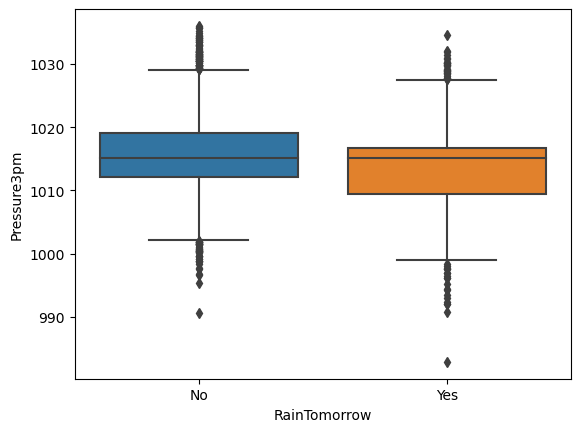

In [92]:
sns.boxplot(x='RainTomorrow', y='Pressure3pm', data=df)

More the pressure in air,less are chances of Raining tomm

<Axes: xlabel='RainTomorrow', ylabel='Cloud3pm'>

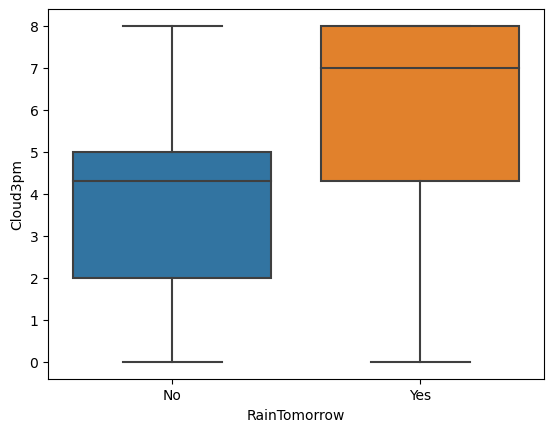

In [93]:
sns.boxplot(x='RainTomorrow', y='Cloud3pm', data=df)

More fraction of sky obscured at 3pm ,more chances of Raining Tomm

<Axes: xlabel='RainTomorrow', ylabel='Temp3pm'>

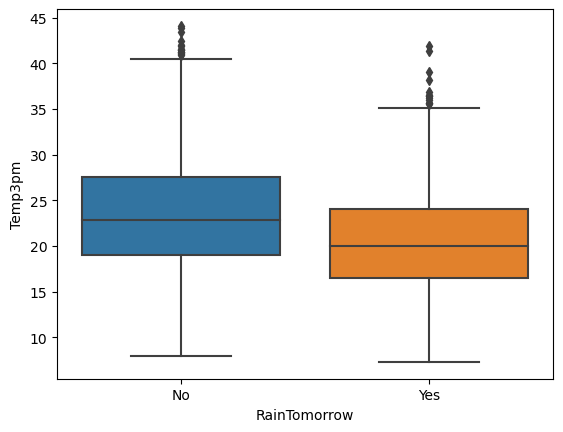

In [94]:
sns.boxplot(x='RainTomorrow', y='Temp3pm', data=df)

Less the temperature rise art 3pm,more the chances of Raining tomm

In [95]:
num

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'month',
 'day']

<Axes: xlabel='MinTemp', ylabel='Rainfall'>

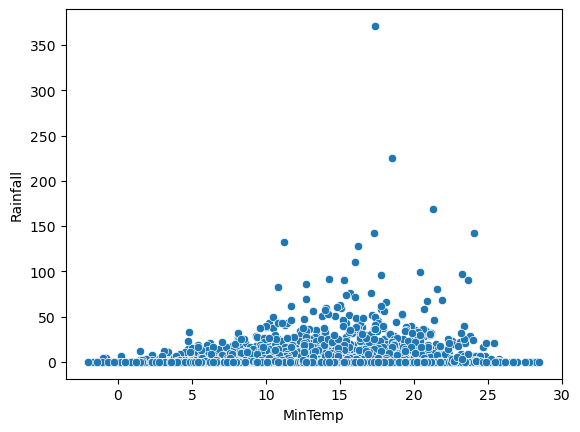

In [98]:
sns.scatterplot(x=num[0],y='Rainfall',data=df)

There is not much correlation between two variables

<Axes: xlabel='Year', ylabel='Rainfall'>

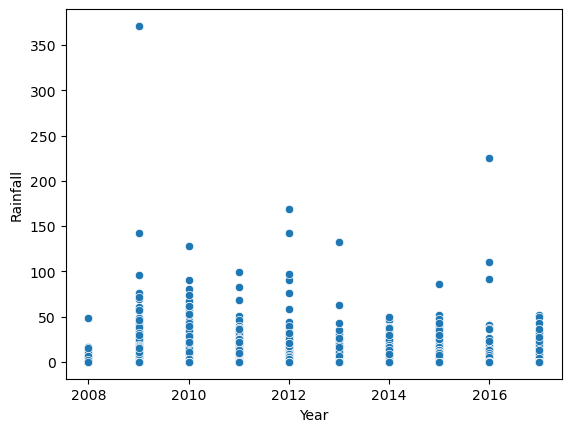

In [102]:
sns.scatterplot(x=num[16],y='Rainfall',data=df)

We observe that Rainfall was most in the year 2012

<Axes: xlabel='month', ylabel='Rainfall'>

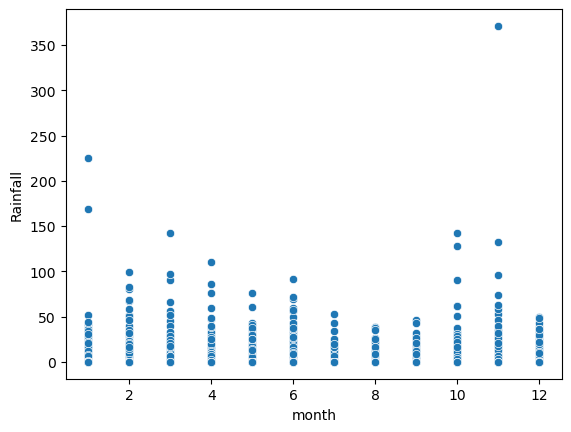

In [104]:
sns.scatterplot(x=num[17],y='Rainfall',data=df)

It is observed that it rains heavily in feb,Mrach,April,Nov,dec Month

<Axes: xlabel='day', ylabel='Rainfall'>

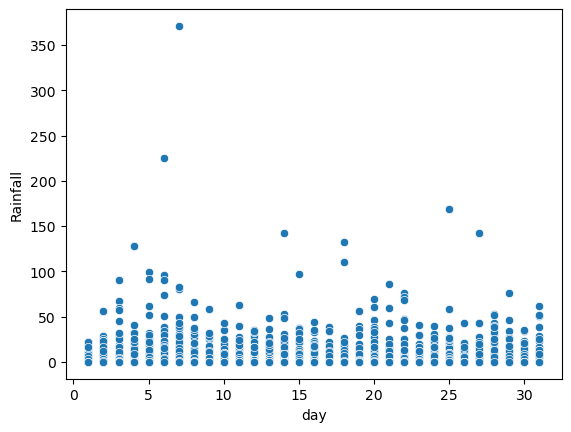

In [105]:
sns.scatterplot(x=num[18],y='Rainfall',data=df)

There is no realtionship between the rains and rainfall

In [114]:
num

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'month',
 'day']

### CHECKING OUTLIERS

<Axes: >

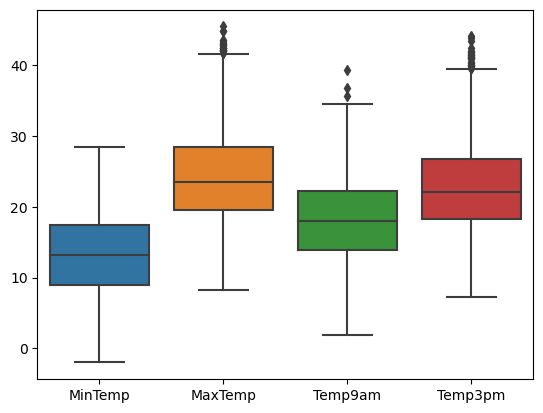

In [113]:
sns.boxplot(data=df[['MinTemp', 'MaxTemp','Temp9am', 'Temp3pm'
                       ]])

<Axes: >

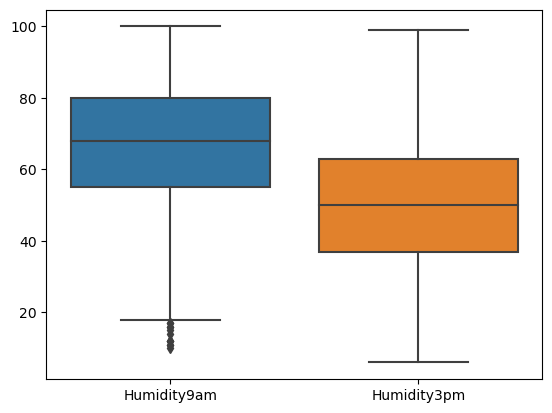

In [116]:
sns.boxplot(data=df[[ 'Humidity9am',
 'Humidity3pm' ]])

Hence we obserev few outliers are present in dataset

<Axes: >

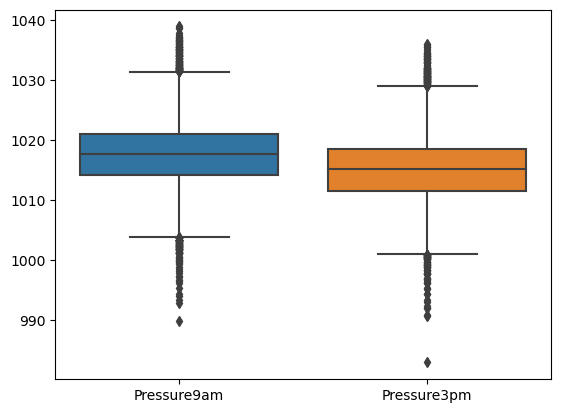

In [117]:
sns.boxplot(data=df[[ 'Pressure9am',
 'Pressure3pm',]])

Also in pressure few outliers are there,lets handle them

In [26]:
from scipy.stats import zscore
out=df[['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed','WindSpeed9am','WindSpeed3pm', 'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm',
 'Cloud9am','Cloud3pm','Temp9am','Temp3pm']]
z=np.abs(zscore(out))
z

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
Date,,,,,,,,,,,,,,,
2008-12-01,0.055140,0.197426,3.107409e-16,6.466260e-16,0.384496,0.734580,0.678836,0.209796,1.521115,1.643851,1.342831,1.479147,3.779032e-16,0.176861,0.151929
2008-12-02,1.017822,0.159799,3.107409e-16,6.466260e-16,0.384496,0.898571,0.469624,1.349792,1.360196,1.166846,1.226410,0.000000,3.779032e-16,0.124730,0.264118
2008-12-03,0.034273,0.257225,3.107409e-16,6.466260e-16,0.532716,0.632509,0.888048,1.696367,1.091997,1.660300,1.076727,0.000000,9.785796e-01,0.535601,0.081057
2008-12-04,0.695934,0.630688,3.107409e-16,6.466260e-16,1.097706,0.184067,0.890252,1.292029,1.842953,0.015453,0.394835,0.000000,3.779032e-16,0.031664,0.630240
2008-12-05,0.788332,1.328902,3.107409e-16,6.466260e-16,0.162166,0.592355,0.260412,0.845183,0.931078,1.133949,1.525777,1.077272,1.574307e+00,0.020467,1.162780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-20,1.715248,0.376039,3.107409e-16,6.466260e-16,0.578935,0.224221,0.471829,0.483354,1.252916,1.152387,1.002211,0.000000,3.779032e-16,1.480146,0.301706
2017-06-21,1.840427,0.116239,3.107409e-16,6.466260e-16,0.578935,0.020077,0.681041,0.945454,1.413835,1.135939,0.852527,0.000000,3.779032e-16,1.358506,0.052078
2017-06-22,1.697365,0.192275,3.107409e-16,6.466260e-16,1.245926,0.020077,0.890252,0.656642,1.574754,0.955006,0.652949,0.000000,3.779032e-16,1.219489,0.297402


In [27]:
df.shape

(6411, 25)

In [28]:
np.where(z>3)

(array([   8,   12,   12,   42,   42,   50,   50,   58,   58,   59,   59,
          60,   60,   60,   65,   66,   66,  121,  265,  269,  292,  377,
         377,  401,  402,  403,  448,  448,  545,  549,  550,  550,  551,
         584,  585,  663,  663,  728,  728,  775,  958,  958, 1507, 1552,
        1606, 1623, 1817, 1822, 1862, 1924, 1936, 1950, 1979, 2071, 2097,
        2097, 2106, 2324, 2349, 2349, 2644, 2652, 2655, 2659, 2665, 2669,
        2673, 2679, 2687, 2693, 2701, 2707, 2710, 2714, 2720, 2728, 2734,
        2742, 2748, 2756, 2762, 2770, 2776, 2780, 2794, 2811, 2829, 2847,
        2853, 2857, 2860, 2861, 2861, 2862, 2868, 2869, 2869, 2869, 2870,
        2872, 2884, 2884, 2884, 2891, 2891, 2901, 2901, 2903, 2943, 2950,
        2953, 2953, 2957, 2957, 2964, 2967, 2969, 2972, 2972, 2984, 2991,
        2998, 3005, 3009, 3017, 3023, 3028, 3045, 3047, 3057, 3068, 3068,
        3069, 3124, 3207, 3210, 3210, 3210, 3211, 3211, 3211, 3219, 3232,
        3252, 3270, 3318, 3363, 3364, 

In [29]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(6143, 25)

Hence,the outliers are handled successfully

In [30]:
df=df_new

##### CHECKING SKEWNESS

In [31]:
df.skew()

MinTemp          -0.078603
MaxTemp           0.259902
Rainfall         13.867652
Evaporation       0.605686
Sunshine         -0.918508
WindGustSpeed     0.495516
WindSpeed9am      0.678216
WindSpeed3pm      0.352004
Humidity9am      -0.228514
Humidity3pm       0.160122
Pressure9am       0.062916
Pressure3pm       0.096774
Cloud9am         -0.198642
Cloud3pm         -0.138373
Temp9am          -0.081861
Temp3pm           0.286805
Year              0.399452
month             0.047722
day               0.006345
dtype: float64

In [32]:
df['Rainfall'] = np.log1p(df['Rainfall'])

In [33]:
df['Sunshine'] = np.power(df['Sunshine'],2)

In [34]:
df.skew()

MinTemp         -0.078603
MaxTemp          0.259902
Rainfall         1.903045
Evaporation      0.605686
Sunshine         0.593900
WindGustSpeed    0.495516
WindSpeed9am     0.678216
WindSpeed3pm     0.352004
Humidity9am     -0.228514
Humidity3pm      0.160122
Pressure9am      0.062916
Pressure3pm      0.096774
Cloud9am        -0.198642
Cloud3pm        -0.138373
Temp9am         -0.081861
Temp3pm          0.286805
Year             0.399452
month            0.047722
day              0.006345
dtype: float64

Hence,skewness is handled successfully

#### ENCODING CATEGORICAL COLUMNS

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df:
    if df[i].dtypes=="object":
               df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [36]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,month,day
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,1,13.4,22.9,0.470004,5.278489,63.163896,13,44.0,13,14,...,1007.1,8.000000,4.299936,16.9,21.8,0,0,2008,12,1
2008-12-02,1,7.4,25.1,0.000000,5.278489,63.163896,14,44.0,6,15,...,1007.8,4.319388,4.299936,17.2,24.3,0,0,2008,12,2
2008-12-03,1,12.9,25.7,0.000000,5.278489,63.163896,15,46.0,13,15,...,1008.7,4.319388,2.000000,21.0,23.2,0,0,2008,12,3
2008-12-04,1,9.2,28.0,0.000000,5.278489,63.163896,4,24.0,9,0,...,1012.8,4.319388,4.299936,18.1,26.5,0,0,2008,12,4
2008-12-05,1,17.5,32.3,0.693147,5.278489,63.163896,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-20,9,3.5,21.8,0.000000,5.278489,63.163896,0,31.0,2,0,...,1021.2,4.319388,4.299936,9.4,20.9,0,0,2017,6,20
2017-06-21,9,2.8,23.4,0.000000,5.278489,63.163896,0,31.0,9,1,...,1020.3,4.319388,4.299936,10.1,22.4,0,0,2017,6,21
2017-06-22,9,3.6,25.3,0.000000,5.278489,63.163896,6,22.0,9,3,...,1019.1,4.319388,4.299936,10.9,24.5,0,0,2017,6,22


In [139]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,month,day
count,6143.000000,6143.000000,6143.000000,6143.000000,6143.000000,6143.000000,6143.000000,6143.000000,6143.000000,6143.000000,...,6143.000000,6143.000000,6143.000000,6143.000000,6143.000000,6143.000000,6143.000000,6143.000000,6143.000000,6143.000000
mean,5.251506,13.028227,24.040860,0.520558,5.081293,70.737355,6.752076,37.952100,7.078952,7.830702,...,1015.307824,4.314578,4.283070,17.850220,22.653931,0.237832,0.230669,2011.978512,6.403549,15.712518
std,3.110429,5.579309,6.030081,0.956250,2.162452,38.562775,5.201279,12.397628,4.567820,4.518999,...,5.707581,2.493333,2.350742,5.697819,5.883035,0.425790,0.421295,2.275733,3.332946,8.803679
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,997.600000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000,2008.000000,1.000000,1.000000
25%,2.000000,8.900000,19.600000,0.000000,4.000000,63.163896,1.000000,30.000000,3.000000,4.000000,...,1011.800000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000,2010.000000,4.000000,8.000000
50%,5.000000,13.000000,23.500000,0.000000,5.278489,63.163896,7.000000,38.811825,7.000000,8.000000,...,1015.174021,4.319388,4.299936,18.000000,22.100000,0.000000,0.000000,2012.000000,6.000000,16.000000
75%,8.000000,17.400000,28.300000,0.587787,5.278489,86.490000,12.000000,44.000000,11.000000,12.000000,...,1018.600000,7.000000,6.000000,22.100000,26.700000,0.000000,0.000000,2014.000000,9.000000,23.000000
max,11.000000,28.300000,42.000000,5.918894,13.800000,193.210000,15.000000,78.000000,15.000000,15.000000,...,1033.100000,8.000000,8.000000,34.500000,40.500000,1.000000,1.000000,2017.000000,12.000000,31.000000


#### SEPERATING INDEPENDENT AND TAEGET VARIABLE

In [140]:
x=df.drop('RainTomorrow',axis=1)
y=df['RainTomorrow']

In [141]:
x.shape

(6143, 24)

In [142]:
y.shape

(6143,)

###### SCALING THE DATA

In [143]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [144]:
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,month,day
0,-1.366966,0.066640,-0.189210,-0.052872,0.091198,-0.196409,1.201326,0.487867,1.296358,1.365303,...,-1.754348,-1.438174,1.478231,0.007176,-0.166783,-0.145163,-0.558611,-1.748376,1.679267,-1.671314
1,-1.366966,-1.008850,0.175657,-0.544419,0.091198,-0.196409,1.393602,0.487867,-0.236226,1.586609,...,-1.252127,-1.315520,0.001930,0.007176,-0.114127,0.279822,-0.558611,-1.748376,1.679267,-1.557716
2,-1.366966,-0.022985,0.275166,-0.544419,0.091198,-0.196409,1.585878,0.649201,1.296358,1.586609,...,-1.771666,-1.157822,0.001930,-0.971292,0.552850,0.092828,-0.558611,-1.748376,1.679267,-1.444118
3,-1.366966,-0.686203,0.656618,-0.544419,0.091198,-0.196409,-0.529158,-1.125476,0.420596,-1.732981,...,-0.039871,-0.439420,0.001930,0.007176,0.043841,0.653809,-0.558611,-1.748376,1.679267,-1.330520
4,-1.366966,0.801558,1.369768,0.180500,0.091198,-0.196409,1.201326,0.245865,-1.330930,-0.183839,...,-1.217491,-1.630915,1.077129,1.581302,-0.008815,1.197790,-0.558611,-1.748376,1.679267,-1.216922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6138,1.205236,-1.707918,-0.371644,-0.544419,0.091198,-0.196409,-1.298262,-0.560806,-1.111989,-1.732981,...,1.189702,1.032426,0.001930,0.007176,-1.483183,-0.298158,-0.558611,2.206717,-0.121089,0.487050
6139,1.205236,-1.833392,-0.106286,-0.544419,0.091198,-0.196409,-1.298262,-0.560806,0.420596,-1.511675,...,1.172384,0.874728,0.001930,0.007176,-1.360319,-0.043167,-0.558611,2.206717,-0.121089,0.600648
6140,1.205236,-1.689993,0.208827,-0.544419,0.091198,-0.196409,-0.144606,-1.286811,0.420596,-1.069063,...,0.981887,0.664465,0.001930,0.007176,-1.219903,0.313821,-0.558611,2.206717,-0.121089,0.714246
6141,1.205236,-1.367347,0.474185,-0.544419,0.091198,-0.196409,-0.721434,-0.076803,0.420596,1.365303,...,0.548939,0.261459,0.001930,0.007176,-0.939071,0.585811,-0.558611,2.206717,-0.121089,0.827844


##### PERFORMING PCA TO REDUCE MULTIDIMENSIONALITY

In [150]:
from sklearn.decomposition import PCA
pca=PCA(n_components=15)
xpca=pca.fit_transform(x)

In [151]:
xpca.shape

(6143, 15)

In [152]:
x=pd.DataFrame(data=xpca)

In [153]:
x.shape

(6143, 15)

##### CORRELATION VALUES

In [160]:
corr=df.corr()

<Axes: >

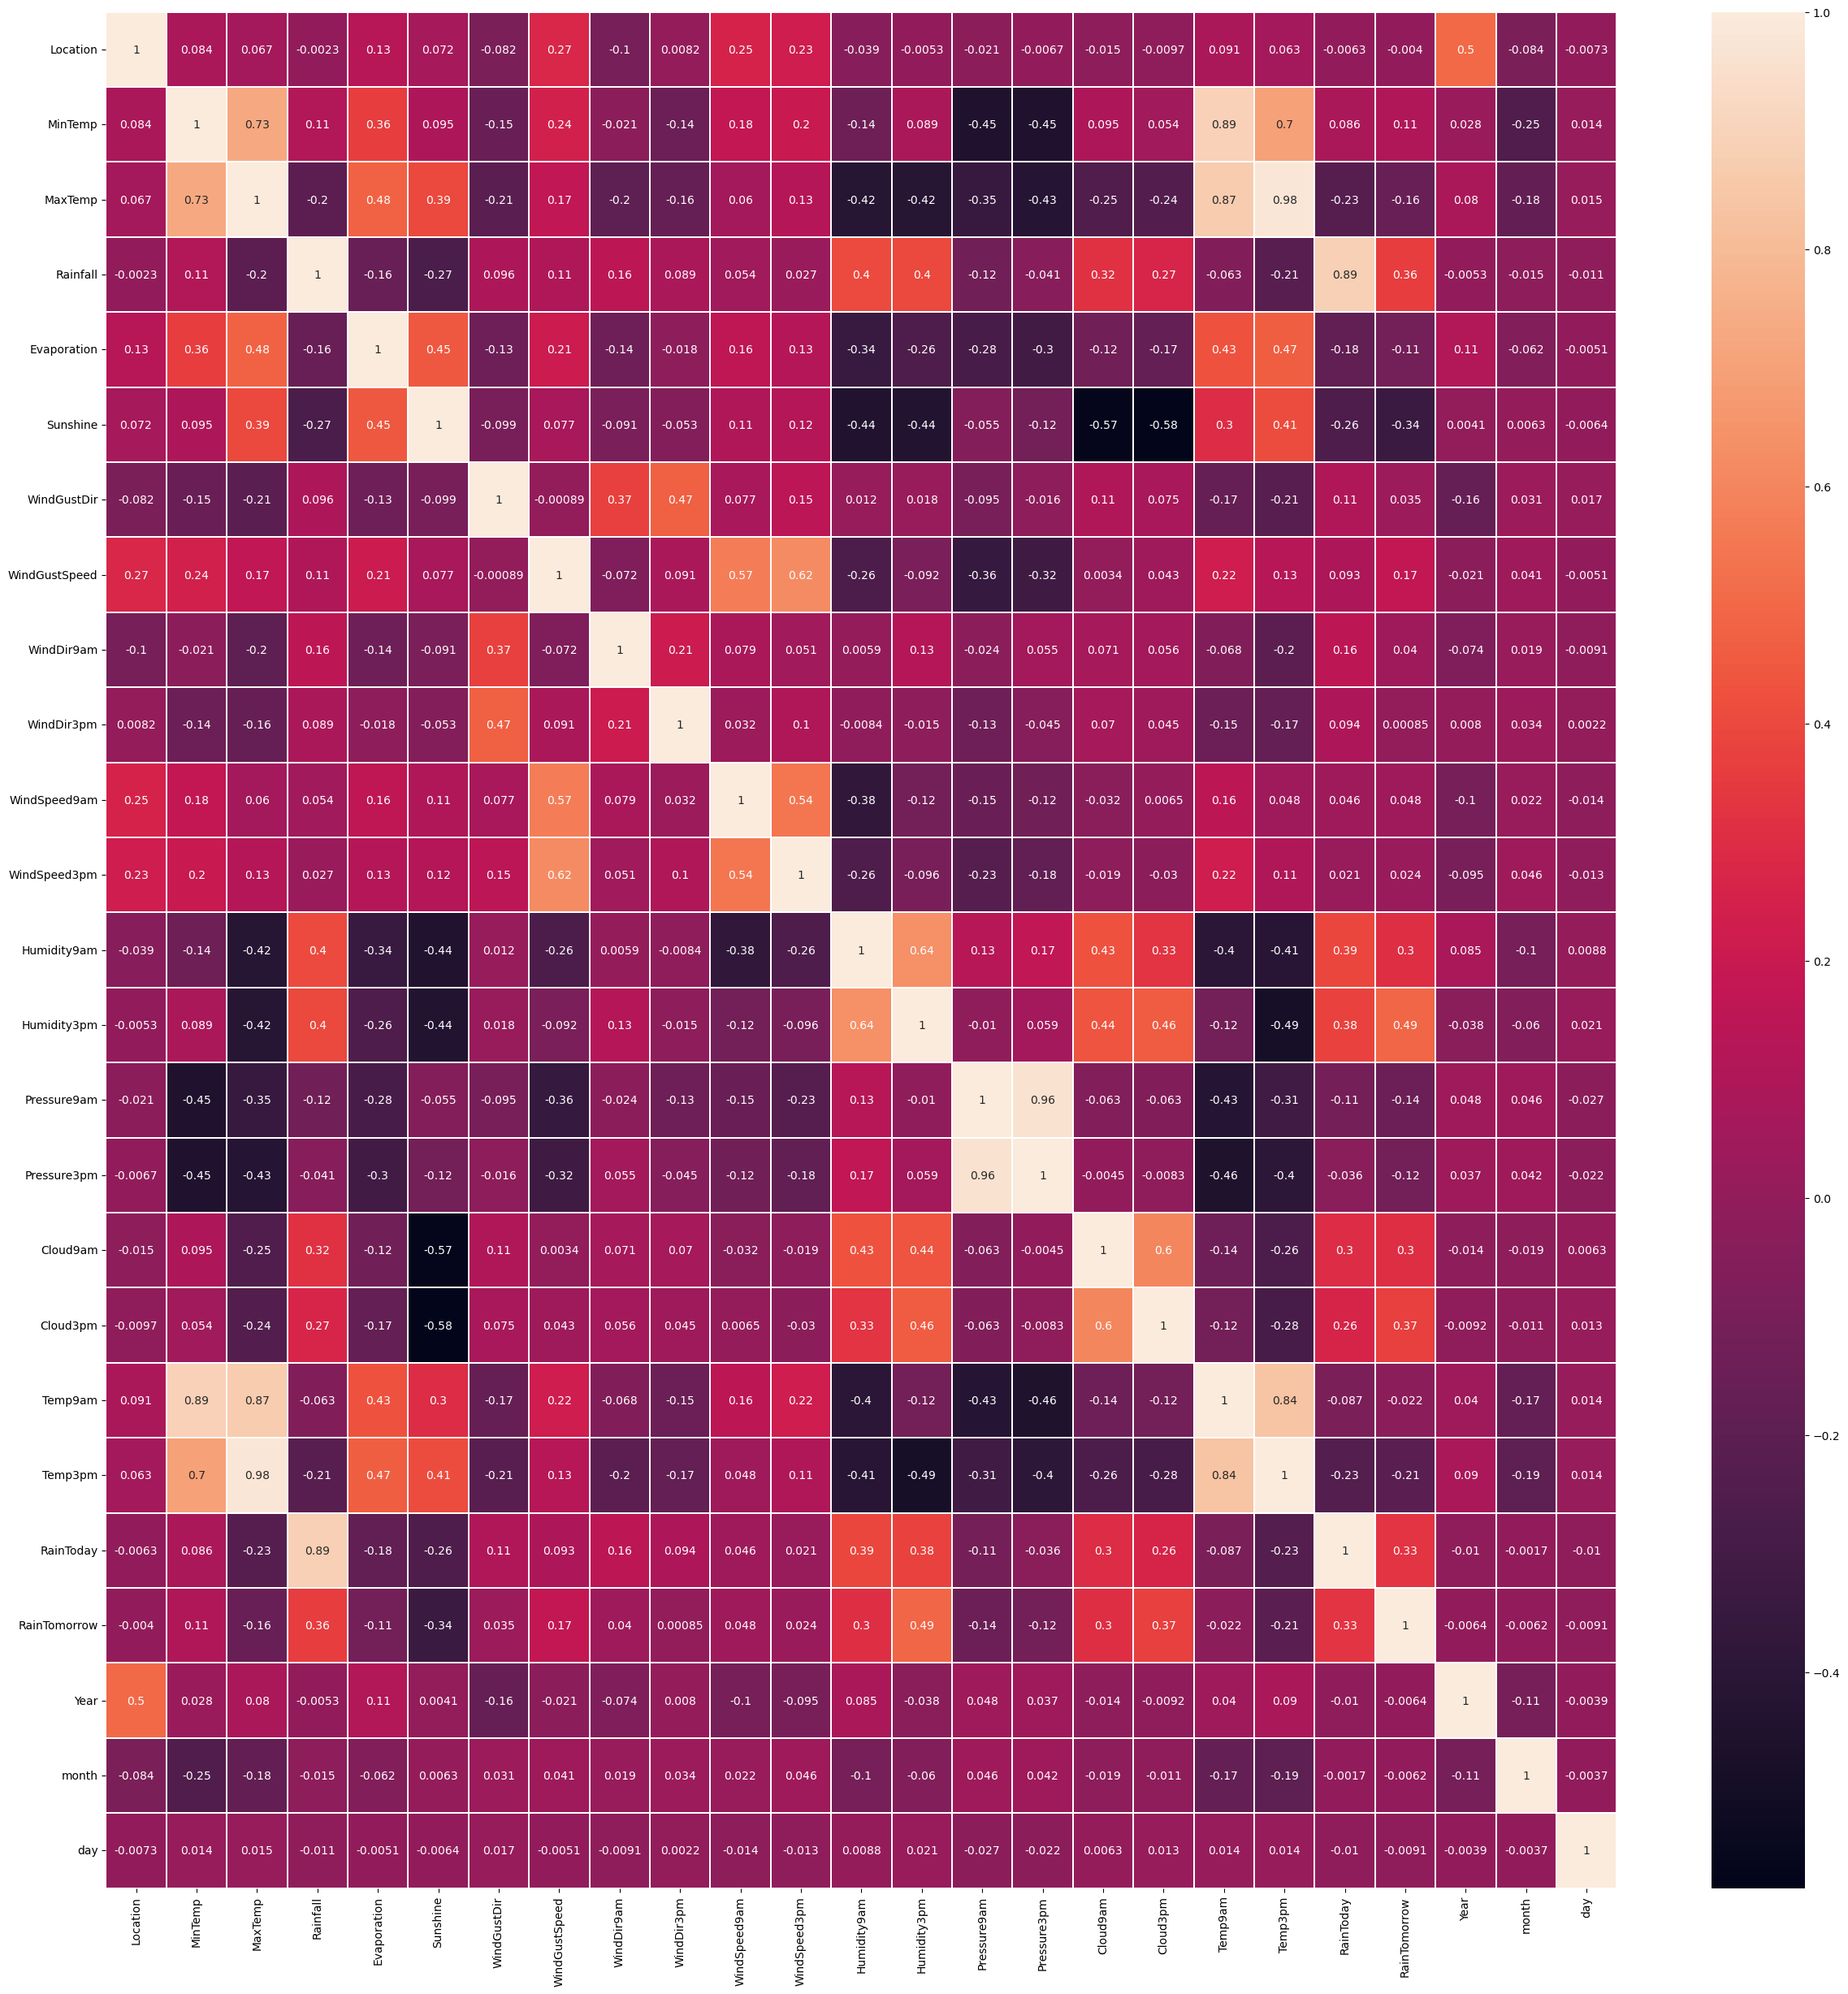

In [161]:
#Visualizing using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,linewidths=0.2)

In [163]:
corr.RainTomorrow.sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.488914
Cloud3pm         0.369383
Rainfall         0.359894
RainToday        0.330370
Cloud9am         0.303595
Humidity9am      0.302620
WindGustSpeed    0.173264
MinTemp          0.106123
WindSpeed9am     0.047947
WindDir9am       0.040198
WindGustDir      0.034796
WindSpeed3pm     0.023802
WindDir3pm       0.000846
Location        -0.004024
month           -0.006241
Year            -0.006377
day             -0.009115
Temp9am         -0.021546
Evaporation     -0.112884
Pressure3pm     -0.117353
Pressure9am     -0.144336
MaxTemp         -0.160606
Temp3pm         -0.205120
Sunshine        -0.335973
Name: RainTomorrow, dtype: float64

From correlation values it is evitable that    
Humidity,cloud and Rinfall are positively correlated   
while temperature3pm and sunshine are negatively correlated  

##### CHECKING VIF VALUES

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
viff=pd.DataFrame()
viff['Columns']=x.columns
viff['values']=[vif(x.values,i) for i in range(len(x.columns))]

viff

,Columns,values
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0
6,6,1.0
7,7,1.0
8,8,1.0
9,9,1.0


As we have performed PCA,hence the issue of multicollinearity is been resolved.

##### CHECKING BALANCE IN THE DATASET

In [165]:
y.value_counts()

0    4726
1    1417
Name: RainTomorrow, dtype: int64

We observe huge difference in balance of target variable.   
Lets handle it by sampling techniques

In [166]:
#!pip install imblearn

In [167]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x1,y1=smote.fit_resample(x,y)

In [168]:
y1.value_counts()

0    4726
1    4726
Name: RainTomorrow, dtype: int64

In [170]:
x1.shape

(9452, 15)

In [171]:
x,y=x1,y1

## MACHINE LEARNING

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
import xgboost


In [175]:
#Making object of ecah model
lr=LogisticRegression()
rfc=RandomForestClassifier()
etc=ExtraTreesClassifier()
gbc=GradientBoostingClassifier()
bc=BaggingClassifier()
svc=SVC()
knn=KNeighborsClassifier()
sgd=SGDClassifier()
xgb=xgboost.XGBClassifier ()   


models=[lr,rfc,etc,gbc,bc,svc,knn,sgd,xgb]

###### CHOOSING RANDOM STATE

In [176]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    ypred=lr.predict(x_test)
    acc=accuracy_score(y_test,ypred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Max accuacy',maxacc,'at random state',i)

Max accuacy 0.7979548660084627 at random state 199


In [177]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=199)

###### ACCUARCY SCORE FOR ALL MODELS

In [180]:
for m in models:
    print("For",m)
    m.fit(x_train,y_train)
    ypred=m.predict(x_test)
    acc=accuracy_score(y_test,ypred)
    print(acc)
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    
    print("-"*60)

For LogisticRegression()
0.7810296191819464
[[1112  293]
 [ 328 1103]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1405
           1       0.79      0.77      0.78      1431

    accuracy                           0.78      2836
   macro avg       0.78      0.78      0.78      2836
weighted avg       0.78      0.78      0.78      2836

------------------------------------------------------------
For RandomForestClassifier()
0.885049365303244
[[1218  187]
 [ 139 1292]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1405
           1       0.87      0.90      0.89      1431

    accuracy                           0.89      2836
   macro avg       0.89      0.88      0.88      2836
weighted avg       0.89      0.89      0.88      2836

------------------------------------------------------------
For ExtraTreesClassifier()
0.907968970380818
[[1254  151]
 [ 110 1321]]
       

From above the best accuracy score is of ExtraTreesclassifier model

###### CROSS VALIDATION

In [181]:
for c in models:
    print("For",c)
    score=cross_val_score(c,x,y,cv=5)
    print(score.mean())
    print("-"*60)

For LogisticRegression()
0.7370970260129436
------------------------------------------------------------
For RandomForestClassifier()
0.8025927324922565
------------------------------------------------------------
For ExtraTreesClassifier()
0.8315803905439019
------------------------------------------------------------
For GradientBoostingClassifier()
0.7320251595555668
------------------------------------------------------------
For BaggingClassifier()
0.7809057663843492
------------------------------------------------------------
For SVC()
0.7209189729126272
------------------------------------------------------------
For KNeighborsClassifier()
0.7204986583622226
------------------------------------------------------------
For SGDClassifier()
0.7146657936927635
------------------------------------------------------------
For XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, de

From above cross validation sscore ,the Extartreesclassifier providing best accuracy score

##### CHOOSING EXTRTREESCLASSIFIER AS BEST MODEL

HYPERPARAMETERTUNING for ETC

In [182]:
parameters={'criterion': ['gini', 'entropy'],
           
           'max_depth': [1, 2, 5],
        'n_estimators': [100,200,300,400],
             'max_features':['sqrt','log2']}
gcv=GridSearchCV(etc,parameters,cv=5)
           
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [183]:
gcv.predict(x_test)

array([1, 0, 1, ..., 1, 1, 1])

In [184]:
gcv.best_score_

0.782193951766675

HYPERPARAMETER TUNING FOR RFC

In [187]:
parameters={'max_depth': [10, 20, 30,],

'max_features': ['auto', 'sqrt'],

'min_samples_leaf': [1, 2, 4],

'min_samples_split': [2, 5, 10],

'n_estimators': [100,200,300, 400]

}
gcv=GridSearchCV(rfc,parameters,cv=5)
           
gcv.fit(x_train,y_train)
gcv.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [188]:
gcv.best_score_

0.8686510790956194

##### CHOOSING RANDOMFORESTCLASSIFIER AS BEST MODEL WITH BEST ACCURACY

In [190]:
rfcmodel=RandomForestClassifier(max_depth= 30,
 max_features= 'auto',
 min_samples_leaf=1,
 min_samples_split= 2,
 n_estimators= 200)
rfcmodel.fit(x_train,y_train)
ypred=rfcmodel.predict(x_test)
acc=accuracy_score(y_test,ypred)
print(acc)

0.8846967559943583


###### AUC ROC CURVE

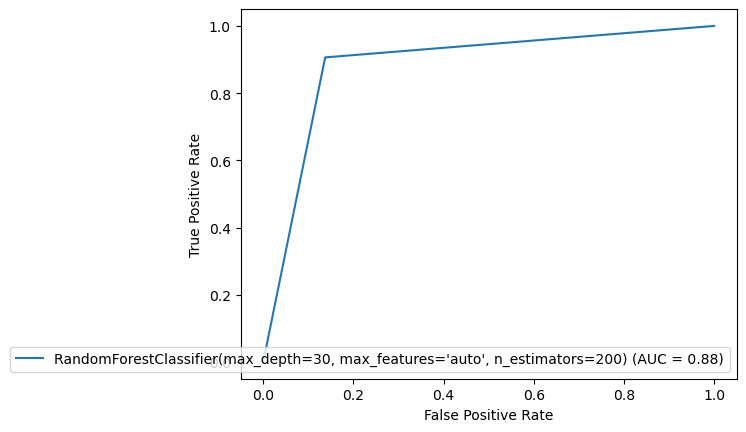

In [196]:
from sklearn import metrics as m
fpr, tpr,threshold= m.roc_curve(y_test, ypred)
roc_auc = m.auc(fpr, tpr)
display=m.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=rfcmodel)
display.plot()

Hence,Auc score=0.88 which is pretty good for prediction

#### SAVING BEST MODEL

In [198]:
import joblib
joblib.dump(rfcmodel,'RainTomm Rainfall weather.pkl')

['RainTomm Rainfall weather.pkl']

In [200]:
model=joblib.load('RainTomm Rainfall weather.pkl')
model

RandomForestClassifier(max_depth=30, max_features='auto', n_estimators=200)

In [202]:
#Predicting values using model
df2=pd.DataFrame()

df2['orginal values']=np.array(y_test)
df2['predicted values']=model.predict(x_test)
df2

,orginal values,predicted values
0,0,1
1,0,0
2,0,1
3,1,1
4,1,1
...,...,...
2831,1,1
2832,1,1
2833,1,1
2834,1,1


## PROBLEM STMNT 2:PREDICT HOW MUCH RAINFALL COULD BE THERE

As our problem stmnt is to predict how much rainfall could be there on any given day  
Hence,our target variable is Rainfall

In [37]:
df.Rainfall.unique()

array([0.47000363, 0.        , 0.69314718, 0.18232156, 0.87546874,
       1.16315081, 1.5260563 , 2.87919846, 2.4510051 , 0.78845736,
       0.58778666, 2.00148   , 0.33647224, 1.38629436, 1.91692261,
       2.53369681, 1.02961942, 2.61006979, 2.24070969, 1.97408103,
       3.04452244, 3.09104245, 1.43508453, 1.75785792, 1.64865863,
       2.19722458, 2.73436751, 1.7227666 , 1.09861229, 1.88706965,
       0.95551145, 1.94591015, 1.68639895, 1.85629799, 1.79175947,
       2.17475172, 2.05412373, 2.37954613, 1.56861592, 1.22377543,
       1.82454929, 2.02814825, 2.66722821, 2.41591378, 2.07944154,
       3.28840189, 2.34180581, 2.59525471, 2.2617631 , 3.9740584 ,
       3.07269331, 4.20469262, 2.48490665, 2.89037176, 2.43361336,
       3.36729583, 3.10906096, 2.97552957, 2.10413415, 2.21920348,
       2.46809953, 2.79728133, 2.360854  , 1.60943791, 3.12676054,
       3.08190997, 3.25037449, 2.39789527, 2.51769647, 2.99573227,
       3.5204608 , 1.48160454, 3.94739015, 3.98154907, 3.00568

In [205]:
df.Rainfall.value_counts()

0.000000    4014
0.182322     298
0.336472     139
0.470004      82
0.788457      64
            ... 
4.314818       1
3.210844       1
4.130355       1
4.859812       1
3.713572       1
Name: Rainfall, Length: 236, dtype: int64

##### As our target variable has 1000 unique values,also the values are in continous form  
Hence,the problem type is of REGRESSION TYPE PROBLEM

In [38]:
df.shape

(6143, 25)

SEPERATING TARGET AND INDEPENDENT VARIABLES

In [39]:
x1=df.drop('Rainfall',axis=1)
y1=df['Rainfall']

In [40]:
x1.shape


(6143, 24)

SCALING VARIABLES

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)
x1

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,month,day
0,-1.366966,0.066640,-0.189210,0.091198,-0.196409,1.201326,0.487867,1.296358,1.365303,0.861122,...,-1.438174,1.478231,0.007176,-0.166783,-0.145163,-0.558611,-0.547568,-1.748376,1.679267,-1.671314
1,-1.366966,-1.008850,0.175657,0.091198,-0.196409,1.393602,0.487867,-0.236226,1.586609,-0.910584,...,-1.315520,0.001930,0.007176,-0.114127,0.279822,-0.558611,-0.547568,-1.748376,1.679267,-1.557716
2,-1.366966,-0.022985,0.275166,0.091198,-0.196409,1.585878,0.649201,1.296358,1.586609,0.750390,...,-1.157822,0.001930,-0.971292,0.552850,0.092828,-0.558611,-0.547568,-1.748376,1.679267,-1.444118
3,-1.366966,-0.686203,0.656618,0.091198,-0.196409,-0.529158,-1.125476,0.420596,-1.732981,-0.135463,...,-0.439420,0.001930,0.007176,0.043841,0.653809,-0.558611,-0.547568,-1.748376,1.679267,-1.330520
4,-1.366966,0.801558,1.369768,0.091198,-0.196409,1.201326,0.245865,-1.330930,-0.183839,-0.578389,...,-1.630915,1.077129,1.581302,-0.008815,1.197790,-0.558611,-0.547568,-1.748376,1.679267,-1.216922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6138,1.205236,-1.707918,-0.371644,0.091198,-0.196409,-1.298262,-0.560806,-1.111989,-1.732981,0.307464,...,1.032426,0.001930,0.007176,-1.483183,-0.298158,-0.558611,-0.547568,2.206717,-0.121089,0.487050
6139,1.205236,-1.833392,-0.106286,0.091198,-0.196409,-1.298262,-0.560806,0.420596,-1.511675,0.086000,...,0.874728,0.001930,0.007176,-1.360319,-0.043167,-0.558611,-0.547568,2.206717,-0.121089,0.600648
6140,1.205236,-1.689993,0.208827,0.091198,-0.196409,-0.144606,-1.286811,0.420596,-1.069063,0.086000,...,0.664465,0.001930,0.007176,-1.219903,0.313821,-0.558611,-0.547568,2.206717,-0.121089,0.714246
6141,1.205236,-1.367347,0.474185,0.091198,-0.196409,-0.721434,-0.076803,0.420596,1.365303,-0.356926,...,0.261459,0.001930,0.007176,-0.939071,0.585811,-0.558611,-0.547568,2.206717,-0.121089,0.827844


In [213]:
corr.Rainfall.sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.886423
Humidity9am      0.401011
Humidity3pm      0.399246
RainTomorrow     0.359894
Cloud9am         0.317558
Cloud3pm         0.270461
WindDir9am       0.156491
MinTemp          0.110743
WindGustSpeed    0.110064
WindGustDir      0.095659
WindDir3pm       0.088849
WindSpeed9am     0.054396
WindSpeed3pm     0.026631
Location        -0.002268
Year            -0.005349
day             -0.011366
month           -0.015382
Pressure3pm     -0.041312
Temp9am         -0.063222
Pressure9am     -0.119289
Evaporation     -0.161101
MaxTemp         -0.204494
Temp3pm         -0.214321
Sunshine        -0.271596
Name: Rainfall, dtype: float64

From above correlation we observe that Raintoday,humidity are highly correlated to target variable

###### PERFORMING PCA FOR MUTLTICOLLINEARITY

In [42]:
from sklearn.decomposition import PCA
pca=PCA(n_components=19)
x1=pd.DataFrame(pca.fit_transform(x1))
x1.shape

(6143, 19)

### MACHINE LEARNING

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor



In [44]:
#Making object of ecah model
lrr=LinearRegression()
rfr=RandomForestRegressor()
etr=ExtraTreesRegressor()
gbr=GradientBoostingRegressor()
br=BaggingRegressor()
svr=SVR()
knnr=KNeighborsRegressor()
sgdr=SGDRegressor()
  


models1=[lrr,rfr,etr,gbr,br,svr,knnr,sgdr]

###### CHOOSING RANDOM STATE

In [45]:
maxacc=0
maxrs=0
for i in range(200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    lrr.fit(x1_train,y1_train)
    ypred1=lrr.predict(x1_test)
    acc=r2_score(y1_test,ypred1)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Max accuacy',maxacc,'at random state',i)

Max accuacy 0.8195409075057848 at random state 199


In [46]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=199)


###### ACCUARCY SCORE FOR ALL MODELS

In [47]:
for m1 in models1:
    print("For",m1)
    m1.fit(x1_train,y1_train)
    ypred1=m1.predict(x1_test)
    acc1=r2_score(y1_test,ypred1)
    print(acc1)
    print(mean_absolute_error(y1_test,ypred1))
    print(mean_squared_error(y1_test,ypred1))
    
    print("-"*60)

For LinearRegression()
0.7898154535245948
0.24282991088786102
0.17729690228714623
------------------------------------------------------------
For RandomForestRegressor()
0.7444388227366374
0.25390210538478
0.21557343693177958
------------------------------------------------------------
For ExtraTreesRegressor()
0.7745916541749898
0.2445045713717798
0.19013862881265883
------------------------------------------------------------
For GradientBoostingRegressor()
0.7383209509932793
0.2697729280467084
0.22073404329831076
------------------------------------------------------------
For BaggingRegressor()
0.7326558201072937
0.25676680037028654
0.22551274931632914
------------------------------------------------------------
For SVR()
0.7740513138443739
0.24044660531754852
0.1905944219164121
------------------------------------------------------------
For KNeighborsRegressor()
0.711962825681404
0.24444810860293845
0.24296790418988087
------------------------------------------------------------

From above the best accuracy score is of linearRegressor model and SGDREgressor

###### CROSS VALIDATION

In [48]:
for c1 in models1:
    print("For",c1)
    score1=cross_val_score(c1,x1,y1,cv=5)
    print(score1.mean())
    print("-"*60)

For LinearRegression()
0.7938682364983238
------------------------------------------------------------
For RandomForestRegressor()
0.727193885054814
------------------------------------------------------------
For ExtraTreesRegressor()
0.7743662290172317
------------------------------------------------------------
For GradientBoostingRegressor()
0.7383036343427544
------------------------------------------------------------
For BaggingRegressor()
0.7005895740606094
------------------------------------------------------------
For SVR()
0.7744442306607482
------------------------------------------------------------
For KNeighborsRegressor()
0.7483830574588867
------------------------------------------------------------
For SGDRegressor()
0.7926477853324247
------------------------------------------------------------


From above cross validation sscore ,the Extartreesclassifier providing best accuracy score

##### CHOOSING EXTRTREESCLASSIFIER AS BEST MODEL

HYPERPARAMETERTUNING for SGDREGRESSOR

In [49]:
parameters={  'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'penalty': ['l1', 'l2', 'elasticnet'],
           'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],}
gcv1=GridSearchCV(sgdr,parameters,cv=5)
           
gcv1.fit(x1_train,y1_train)
gcv1.best_params_

{'alpha': 0.0001, 'learning_rate': 'adaptive', 'penalty': 'l2'}

In [50]:
gcv1.predict(x1_test)

array([-0.07932643,  2.12665978,  1.91925995, ...,  0.12642587,
       -0.10143405,  0.11727585])

In [51]:
gcv1.best_score_

0.7961842091369224

##### CHOOSING SGDREGRESSOR AS BEST MODEL WITH BEST ACCURACY

In [52]:
sgdrmodel=SGDRegressor(alpha= 0.0001, learning_rate='adaptive', penalty= 'l2')
sgdrmodel.fit(x1_train,y1_train)
ypred1=sgdrmodel.predict(x1_test)
acc1=r2_score(y1_test,ypred1)
print(acc1)

0.7898413791542429


In [54]:
lrmodel=LinearRegression()
lrmodel.fit(x1_train,y1_train)
ypred1=lrmodel.predict(x1_test)
acc1=r2_score(y1_test,ypred1)
print(acc1)

0.7898154535245948


###### SAVING BEST MODEL

In [55]:
import joblib
joblib.dump(sgdrmodel,' Rainfall weather.pkl')

[' Rainfall weather.pkl']

In [56]:
model1=joblib.load(' Rainfall weather.pkl')
model1

SGDRegressor(learning_rate='adaptive')

In [57]:
#Predicting values using model
df3=pd.DataFrame()

df3['orginal values']=np.array(y1_test)
df3['predicted values']=model1.predict(x1_test)
df3

,orginal values,predicted values
0,0.000000,-0.078047
1,2.451005,2.126741
2,1.568616,1.918382
3,0.000000,-0.028097
4,0.182322,0.075858
...,...,...
1838,0.000000,-0.081758
1839,0.000000,0.324372
1840,0.000000,0.129181
1841,0.000000,-0.101043
